In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [14]:
class LogisticNet(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(LogisticNet, self).__init__()
        self.linear = nn.Linear(D_in, D_out)

    def forward(self, x):
        lin = self.linear(x)
        return lin

In [15]:
def train(model, loss_func, optimizer, trX, trY):
    model.train()
    # model.eval()
    x = Variable(trX, requires_grad=False)
    y = Variable(trY, requires_grad=False)
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [16]:
def valid(model, loss_func, valX, valY):
    x = Variable(valX, requires_grad=False)
    y = Variable(valY, requires_grad=False)

    outputs = model(x)
    val_loss = loss_func(outputs, y)
    # calculate accuracy
    _, predY = torch.max(outputs.data, 1)
    correct = (predY == y.data).sum()
    val_acc = float(correct) / y.size(0)
    return val_loss.data[0], val_acc

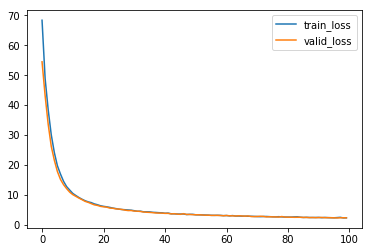

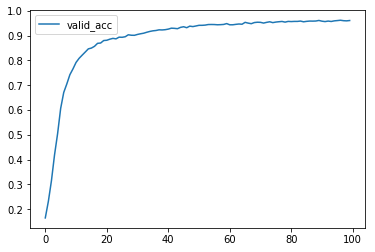

In [ ]:
digits = load_digits()
data = digits['data']
target = digits['target']
# separate data
trX, teX, trY, teY = train_test_split(data, target, test_size=0.2, random_state=0)

n_samples = trX.shape[0]
input_dim = trX.shape[1]
n_classes = 10
model = LogisticNet(input_dim, n_classes)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

train_ = torch.utils.data.TensorDataset(torch.from_numpy(trX).float(), torch.from_numpy(trY.astype(np.int64)))
train_iter = torch.utils.data.DataLoader(train_, batch_size=100, shuffle=True)
valid_ = torch.utils.data.TensorDataset(torch.from_numpy(trX).float(), torch.from_numpy(trY.astype(np.int64)))
valid_iter = torch.utils.data.DataLoader(train_, batch_size=100, shuffle=True)

N_EPOCHS = 100
torch.manual_seed(1)
loss_all = []
val_loss_all = []
val_acc_all = []
for epoch in range(N_EPOCHS):
    loss = 0
    val_loss = 0
    val_acc = 0
    for i, train_data in enumerate(train_iter):
        inputs, labels = train_data
        loss += train(model, loss_func, optimizer, inputs, labels)
    loss_all.append(loss)
    for j, valid_data in enumerate(valid_iter):
        inputs, labels = valid_data
        val_loss_, val_acc_ = valid(model, loss_func, inputs, labels)
        val_loss += val_loss_
        val_acc += val_acc_
    val_loss_all.append(val_loss)
    val_acc_all.append(val_acc / (j + 1))
plt.plot(range(N_EPOCHS), loss_all, label='train_loss')
plt.plot(range(N_EPOCHS), val_loss_all, label='valid_loss')
plt.legend()
plt.show()
plt.plot(range(N_EPOCHS), val_acc_all, label='valid_acc')
plt.legend()
plt.show()